In [63]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

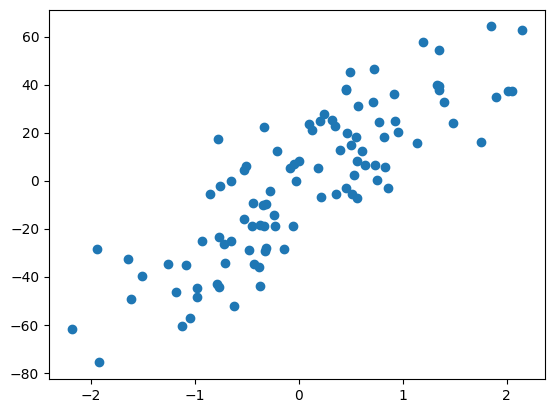

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [8]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [200]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 1000
        self.b = 50
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        color = iter(cm.rainbow(np.linspace(0, 1, self.epochs)))
        lw = 10
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            c = next(color)
            lw -= 0.2
            plt.scatter(self.m,self.b,color=c,linewidths=lw)
            plt.xlabel('m')
            plt.ylabel('b')


            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        plt.show()


    def predict(self,X):
        return self.m * X + self.b


In [233]:
gd = GDRegressor(0.001,25)

# The Gradient Descent curve starts with large sized violet circles
## With every iteration, the circle decreases in size and changes color
## with red being the color where the gradient curve stops

44.21733723060681 -4.990332990792055


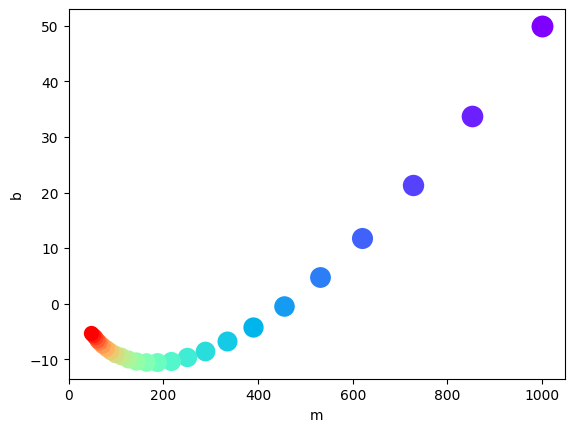

In [234]:
gd.fit(X_train,y_train)

In [203]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6332440526188705

# Trying with different higher learning rate

32.34342791200397 3.8332948159221925


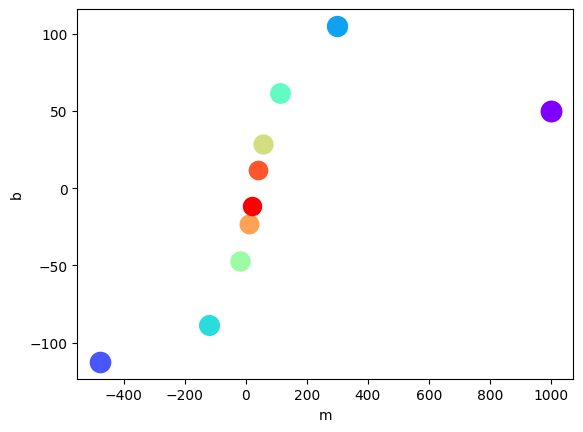

In [224]:
gd = GDRegressor(0.01,10)
gd.fit(X_train,y_train)

# Trying with lower learning rate
# Note - The model does not converge at 0 in 50 epochs

47.13309589545533 -5.170383196624831


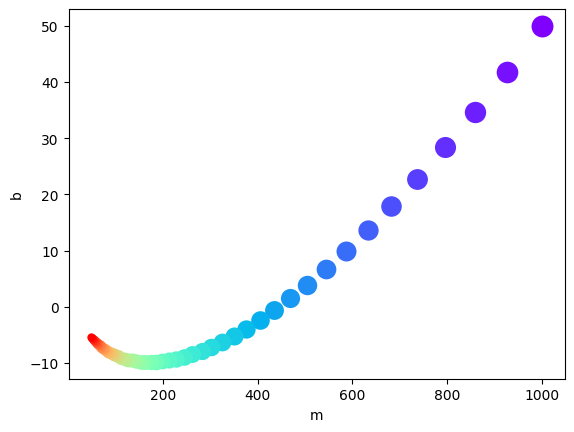

In [242]:
gd = GDRegressor(0.0005,50)
gd.fit(X_train,y_train)

#With the above learning rate and more epochs, the model converges at 0

28.512744392066327 -2.389927670158641


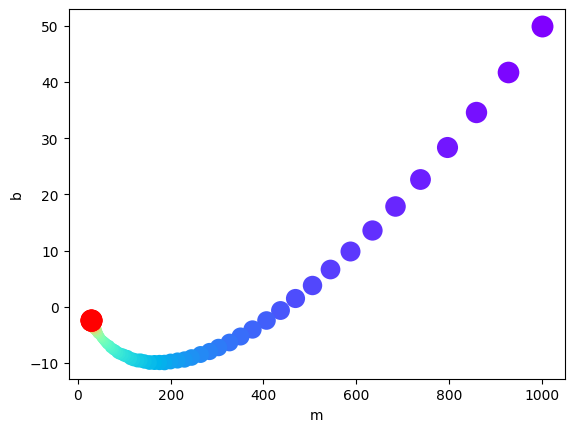

In [243]:
gd = GDRegressor(0.0005,100)
gd.fit(X_train,y_train)

# With higher learning rate, the model converges with just 10 epochs

30.495691402059958 -3.024003096356843


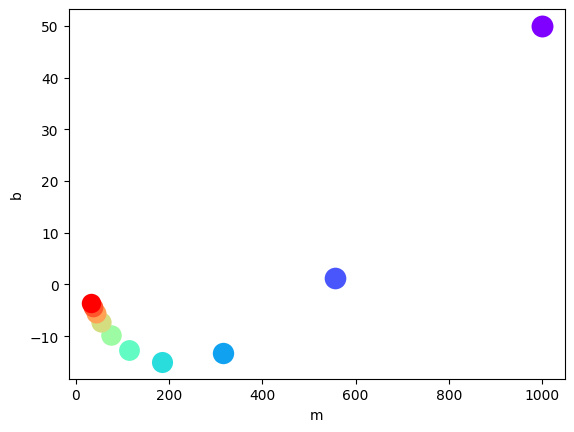

In [221]:
gd = GDRegressor(0.003,10)
gd.fit(X_train,y_train)